In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [2]:
fList = []
with open("林德福_output.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '德福', '主席', '各位', '列席', '官員', '各位', '同仁', '本席', '請教', '主委', '主計', '總處', '預估', '臺灣', '今年', '經濟', '成長率', '經濟', '景氣', '燈號', '連續', '綠燈', '所以', '月初', '時候', '臺灣', '整個', '股市', '沒有', '理由', '不好', '非常', '穩健', '樂觀', '股市', '經濟', '櫥窗', '為什麼', '現在', '股會量', '縮價', '是不是', '經濟', '可能', '轉或', '股市', '提前', '出現', '悖離', '所以', '下跌', '主席', '金管會', '主任委員', '說明', '主任委員', '銘宗', '主席', '各位', '委員', '一段', '期間', '股市', '下跌', '大概', '幾個', '因素', '第一', '禮拜四', 'fed', '開會', '外界', '疑慮', '到底', '不會', '升息', '第二個', '蘇格蘭', '禮拜', '公投', '脫離', '英國', '第三個', '國內', '最近', '劣質', '油品', '事情', '幾個', '因素', '慢慢', '消除', '之後', '相信', '股市', '部分', '慢慢', '今天', '下跌', '主要', '亞股', '有關', '今天', '亞股', '開盤', '幾乎', '下跌', '左右', '現在', '大概', '跌了將', '左右', '委員', '德福', '現在', '亞股', '指數', '一百多', '主任委員', '銘宗', '委員', '德福', '主委', '蘇格蘭', '公投', '結果', '已經', '確定', '劣質', '油品', '事件', '大致', '底定', '這些', '確定', '因素', '排除', '為什麼', '股市', '繼續', '下跌', '是不是', '股民', '認為', '未來', '經濟', '可能', '反轉', '部長', '有沒有', '什麼', '主席', '財政部', '部長', '說明', '部長', '主席', '各位', '委員', '認

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(29661 unique tokens: ['fed', 'qe', '一下', '一些', '一個']...)
------------------------------


In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 2), (1, 4), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 7), (16, 2), (17, 1), (18, 1), (19, 1), (20, 5), (21, 2), (22, 2), (23, 2), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 12), (35, 9), (36, 6), (37, 2), (38, 3), (39, 1), (40, 2), (41, 1), (42, 2), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 3), (51, 1), (52, 3), (53, 3), (54, 3), (55, 1), (56, 3), (57, 2), (58, 1), (59, 2), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 4), (82, 3), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 3), (93, 1), (94, 3), (95, 1), (96, 1), (97, 6), (98, 2), (99, 2), (100, 1), (101, 1), (102, 2), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 4), (10

In [5]:
import os

import gensim
# os.envirom.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = r'//Users/Binying/mallet/bin/mallet'
#'OS(C:)/mallet-2.0.8/bin/mallet'
ldamal = gensim.models.wrappers.LdaMallet(mallet_path, id2word=dict, corpus=corpus, num_topics=20)
output = open("CkipNewsCis18850-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('次長', 0.0682638512903808), ('委員', 0.030364555134452263), ('我們', 0.025356433856704566), ('德福', 0.024002887565421405), ('署長', 0.022920050532394876), ('現在', 0.013625699332250496), ('因為', 0.01096372495939361), ('主席', 0.010738133910846418), ('很多', 0.010647897491427541), ('這個', 0.010377188233170907), ('認為', 0.010016242555495398), ('其實', 0.00924923299043494), ('可以', 0.00888828731275943), ('部分', 0.008391987005955604), ('就是', 0.007760332070023462), ('地方', 0.007534741021476268), ('所以', 0.006857967875834687), ('但是', 0.006812849666125248), ('希望', 0.006677495036996932), ('這些', 0.006361667569030861)]

strTM =  1[('院長', 0.08283566721581549), ('委員', 0.03480230642504119), ('德福', 0.027337314662273477), ('我們', 0.01395181219110379), ('行政院', 0.013385502471169687), ('清德', 0.011943986820428337), ('因為', 0.011377677100494234), ('問題', 0.010399505766062602), ('現在', 0.009781713344316309), ('沒有', 0.008957990115321252), ('榮津', 0.00880354200988468), ('認為', 0.00839168039538715), ('政府', 0.00828871499176276

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=30; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.27918966923548455
Num_topics:  6  Coherence Score=  0.31908538589957197
Num_topics:  9  Coherence Score=  0.330579494852845
Num_topics:  12  Coherence Score=  0.3639067315880676
Num_topics:  15  Coherence Score=  0.3694514046660861
Num_topics:  18  Coherence Score=  0.38409779660681487
Num_topics:  21  Coherence Score=  0.3888526326579393
Num_topics:  24  Coherence Score=  0.3815959526856439
Num_topics:  27  Coherence Score=  0.3905584992364854


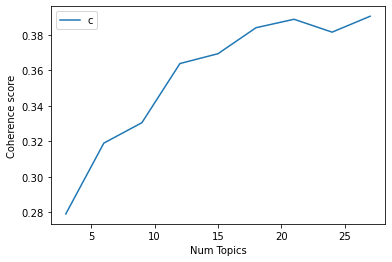

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.2792
Num Topics = 6  has Coherence Value of 0.3191
Num Topics = 9  has Coherence Value of 0.3306
Num Topics = 12  has Coherence Value of 0.3639
Num Topics = 15  has Coherence Value of 0.3695
Num Topics = 18  has Coherence Value of 0.3841
Num Topics = 21  has Coherence Value of 0.3889
Num Topics = 24  has Coherence Value of 0.3816
Num Topics = 27  has Coherence Value of 0.3906
Optimal Topic Num = 27  Highest Value = 0.3905584992364854


In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.054*"次長" + 0.036*"委員" + 0.029*"德福" + 0.015*"主席" + 0.012*"你們" + 0.011*"各位" '
  '+ 0.010*"局長" + 0.009*"交通部" + 0.008*"問題" + 0.008*"可以" + 0.008*"本席" + '
  '0.008*"因為" + 0.007*"說明" + 0.006*"部分" + 0.006*"疫情" + 0.006*"補助" + 0.006*"目前" '
  '+ 0.005*"民眾" + 0.005*"發生" + 0.005*"應該" + 0.005*"衛福部" + 0.005*"防疫" + '
  '0.004*"疫苗" + 0.004*"賀陳" + 0.004*"針對"'),
 (1,
  '0.076*"主任委員" + 0.032*"委員" + 0.029*"主委" + 0.029*"德福" + 0.022*"立雄" + '
  '0.018*"我們" + 0.016*"金管會" + 0.012*"投資" + 0.011*"相關" + 0.009*"現在" + '
  '0.009*"沒有" + 0.009*"部分" + 0.008*"公司" + 0.007*"應該" + 0.007*"銀行" + 0.007*"這些" '
  '+ 0.007*"金融" + 0.006*"天牧" + 0.006*"有沒有" + 0.006*"還是" + 0.006*"市場" + '
  '0.006*"他們" + 0.006*"交易" + 0.006*"說明" + 0.005*"資金"'),
 (2,
  '0.020*"民進黨" + 0.013*"行政院" + 0.013*"條例" + 0.011*"委員會" + 0.010*"投票" + '
  '0.010*"政府" + 0.009*"委員" + 0.009*"政黨" + 0.008*"本席" + 0.008*"草案" + 0.008*"審查" '
  '+ 0.008*"總統" + 0.008*"本院" + 0.008*"同仁" + 0.007*"報告" + 0.007*"會議" + '
  '0.007*"提案" + 0.007*"提出" + 0.007*"立法院" + 0.007*"討論" +